## <small>
Copyright (c) 2017-21 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning: A Visual Approach
## by Andrew Glassner, https://glassner.com
### Order: https://nostarch.com/deep-learning-visual-approach
### GitHub: https://github.com/blueberrymusic
------

### What's in this notebook

This notebook is provided to help you work with Keras and TensorFlow. It accompanies the bonus chapters for my book. The code is in Python3, using the versions of libraries as of April 2021.

Note that I've included the output cells in this saved notebook, but Jupyter doesn't save the variables or data that were used to generate them. To recreate any cell's output, evaluate all the cells from the start up to that cell. A convenient way to experiment is to first choose "Restart & Run All" from the Kernel menu, so that everything's been defined and is up to date. Then you can experiment using the variables, data, functions, and other stuff defined in this notebook.

## Bonus Chapter 2 - Notebook 1: Preparing Data

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as Keras_backend
from tensorflow.keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

Using TensorFlow backend.


In [2]:
# Workaround for Keras issues on Mac computers (you can comment this
# out if you're not on a Mac, or not having problems)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# Make a File_Helper for saving and loading files.

save_files = False

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

In [4]:
# reshape a Python array using reshape() called from NumPy
demoData = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
newData = np.reshape(demoData, (6, 2))
print(newData)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [5]:
# reshape a NumPy array by calling reshape() as one of its methods
demoData = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
newData = demoData.reshape((6, 2))
print(newData)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [6]:
# reshaping to an incompatible size causes an error
demoData = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
# uncomment the next line to see the error
# demoData.reshape((5,15))

In [7]:
random_seed = 42
np.random.seed(random_seed)

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = Keras_backend.cast_to_floatx(X_train)
X_test = Keras_backend.cast_to_floatx(X_test)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# save the original y_train and y_test
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

In [8]:
def show_demo_grid(seed, filename):
    # Show a grid of random digits
    demo_grid = [[[] for x in range(10)] for y in range(10)] 
    num_found = 0
    attempts = 0
    np.random.seed(seed)
    while (num_found < 100) and (attempts < X_train.shape[0]):
        attempts += 1
        index = np.random.randint(0, X_train.shape[0])
        label = original_y_train[index]
        placed = False
        for column in range(10):
            if (not placed) and (not demo_grid[label][column]):
                num_found += 1
                demo_grid[label][column] = index
                placed = True

    plt.figure(figsize=(20,20))
    for y in range(10):
        for x in range(10):
            plt.subplot(10, 10, 1 + (y*10) + x)
            list_index = demo_grid[y][x]
            img = X_train[list_index].reshape(28, 28)
            plt.imshow(img, cmap=plt.get_cmap('gray'))
            frame = plt.gca()
            frame.axes.get_xaxis().set_visible(False)
            frame.axes.get_yaxis().set_visible(False)
    file_helper.save_figure(filename)
    plt.show()

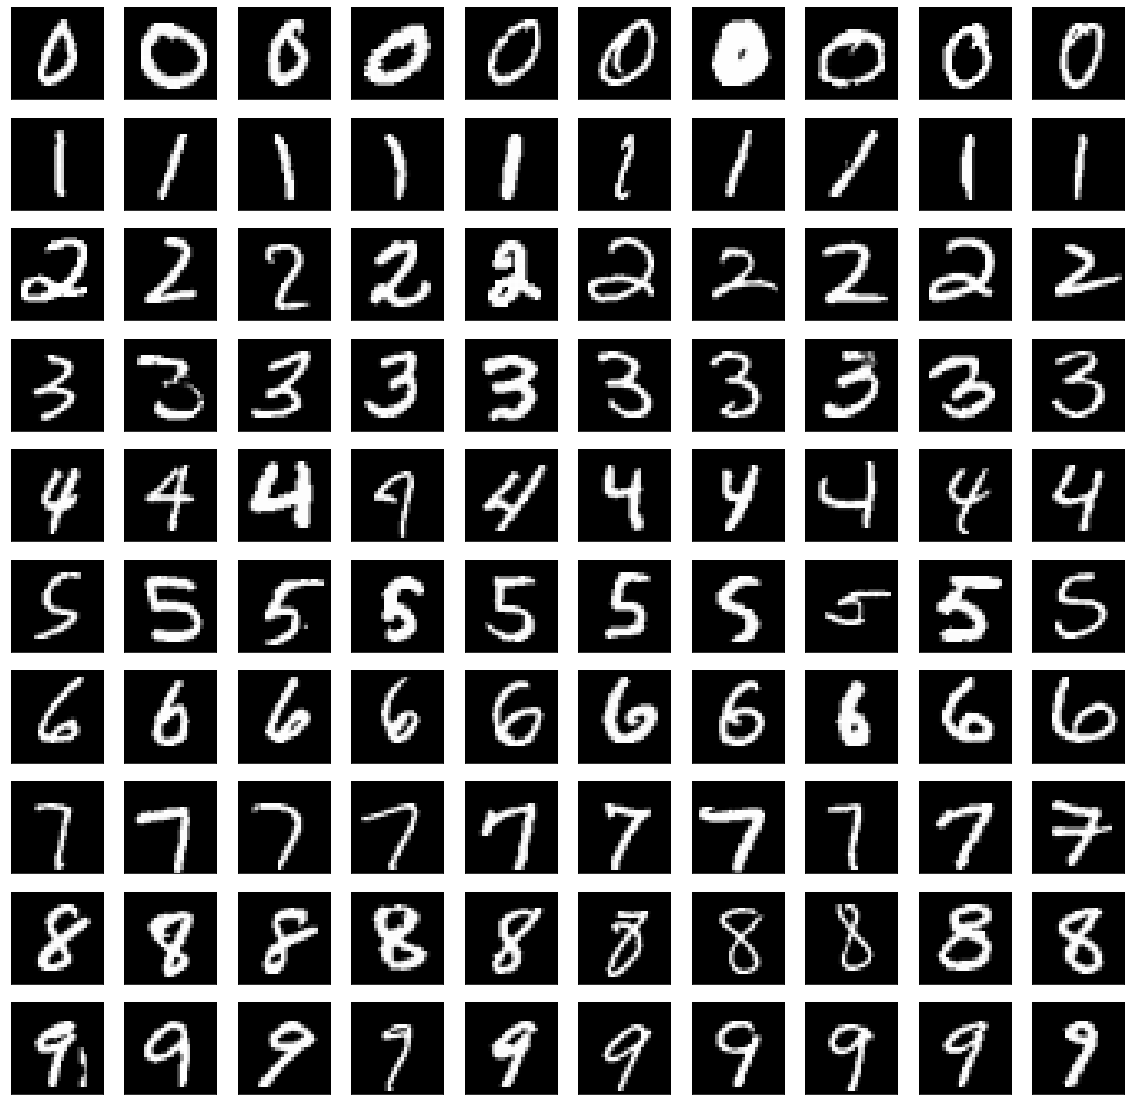

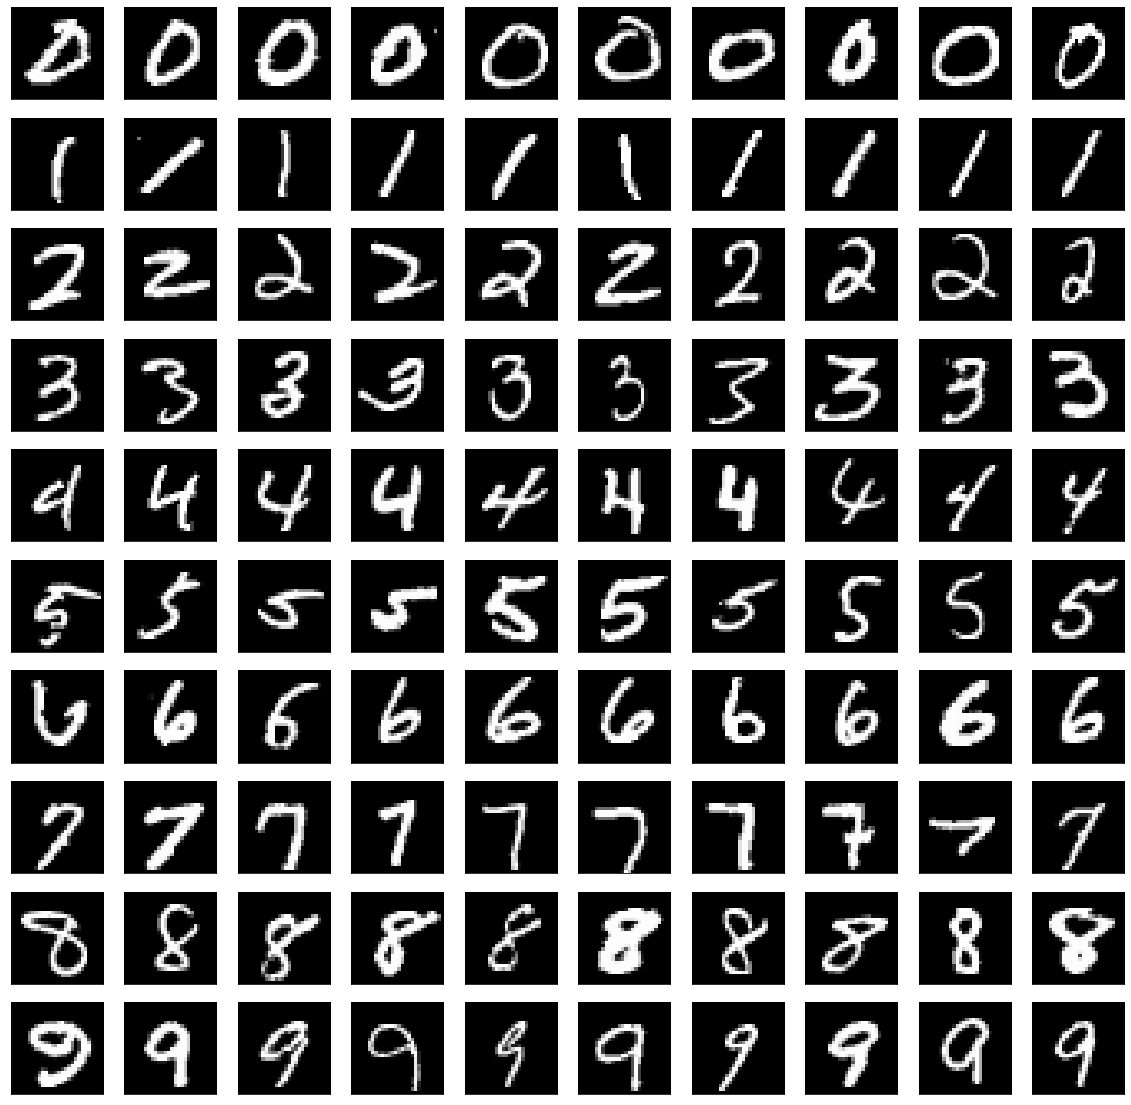

In [9]:
show_demo_grid(5, 'MNIST-demo')
show_demo_grid(42, 'MNIST-demo2')

In [10]:
# show a set of training digits in 10-column form
def showset(setlist, filename = None):
    num_columns = 10 
    num_rows = int(len(setlist)/num_columns)
    plt.figure(figsize=(num_columns, num_rows))
    plt.subplots_adjust(hspace=0.4)
    for index in range(len(setlist)):
        y = int(index/num_columns)
        x = index - (y*num_columns)
        ax = plt.subplot(num_rows, num_columns, 1 + index)
        img = X_train[setlist[index]].reshape(28, 28)
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        ax.axis("off")
        plt.title(str(setlist[index])+','+str(np.argmax(y_train[setlist[index]])))
        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    file_helper.save_figure(filename)
    fig = plt.gcf()
    fig.tight_layout()
    plt.show()
    

# I built up these lists by hand while looking through the training set
confusing = ( 8689, 51176, 50994, 3370, 
            4986, 4522, 57380, 9472, 140, 494, 
            56569, 54975,
            54834, 56286,
            11711, 14335, 15324, 15434, 15862, 
            40664, 50239, 50856, 
            16676, 26398, 26624, 27514, 29897, 
            40876, 52074, 53638)

cropped = ( 12184, 3089, 3002, 9363, 2231, 26447,
           28491, 500, 5052, 55475, 
           #6498, 6506,
          #7142, 7434, 517, 875, 957, 1101, 2135,
          #10124, 16192, 16938, 20446, 25692, 873, 
          #50391, 52514, 4761, 53006, 53248, 56678 
          )

noisy = ( 51323, 51363, 51459, 53205, 55539, 
         26471, 25159,7599, 10677, 58871,
         #2595, 3163, 3867, 5009, 9139, 1875, 7329,
        #7947, 8675, 9395, 451, 67, 933, 1023, 1165, 1157,
        #1623, 1677, 10251, 10867, 11853, 12113, 12123,
        #26391, 40977, 2693, 29437, 
        #58797, 13259, 14929, 15309, 16275,  25801, 27793,
        #40159, 50459, 51863, 52253, 54085, 55285, 56659, 
        #58801, 15963,  3065, 
        )

edged = ( 2492, 4880, 3442, 11947, 7195, 4759, 3382, 2133, 
         7192, 2380, 
         #3349, 3599, 3991, 
        #4396, 3894, 5892, 5893, 5897, 7198, 
        #8990, 8991, 11894, 11898, 3835, 12599 
        )

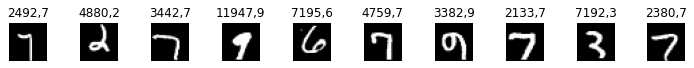

In [11]:
showset(edged, 'MNIST-edged')

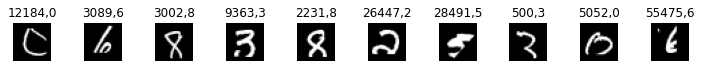

In [12]:
showset(cropped, 'MNIST-miscropped')

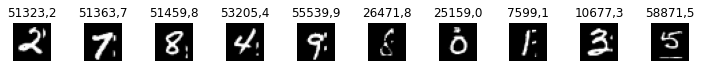

In [13]:
showset(noisy, 'MNIST-noisy')

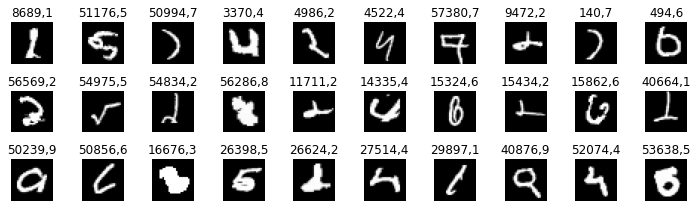

In [14]:
showset(confusing, 'MNIST-confusing')

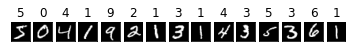

In [15]:
# Show the first few images
num_images = 15
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(original_y_train[i])
    plt.xticks([],[])
    plt.yticks([],[])
file_helper.save_figure('MNIST-first-few')
plt.show()

In [16]:
one_hot = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
print("one_hot represents the integer ",one_hot.index(1))

one_hot represents the integer  3


In [17]:
one_hot_np = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
print("one_hot_np represents the integer ",np.argmax(one_hot_np))

one_hot_np represents the integer  3
